In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [3]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,7,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.0,0.165387,0.530838,5.105129,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.0,0.056365,0.243387,5.248623,0.016772,0.142619


In [4]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,49.622176,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.058472,0.084281,0.365536,2.680103,1.357545,14.574041
std,0.499031,78.524757,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.230465,0.109621,0.408358,2.353441,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.000000,0.017751,0.136692,0.450561,0.010526,0.104251
50%,1.000000,12.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.000000,0.045752,0.230747,1.945910,0.043478,0.238606
75%,1.000000,55.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.000000,0.088862,0.451218,5.065383,0.949402,24.144412
max,1.000000,291.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,1.386294,0.529903,2.183383,8.187960,12.902439,198.461303


In [5]:
#check if there is any null value
data.isnull().values.any()

False

In [6]:
def print_metrics(train_label, train_pred, test_label, test_pred):
    #evaulate the accuracy on the train set and the test set
    #metrics also contains precision, recall, f1 and the support
    print('Accuracy train set ', metrics.accuracy_score(train_label, train_pred))
    print('Accuracy test set ', metrics.accuracy_score(test_label, test_pred))
    print('Precision train set ', metrics.precision_score(train_label, train_pred, average='weighted'))
    print('Recall train set ', metrics.recall_score(train_label, train_pred, average='weighted'))
    print('F1 score train set ', metrics.f1_score(train_label, train_pred, average='weighted'))
    print('Support train set ', metrics.precision_recall_fscore_support(train_label, train_pred))

In [7]:
#metrics computed on the test set
def report_scores(test_label, test_pred):
    print(classification_report(test_label, 
                            test_pred, 
                            target_names=['<=50', '>50']))

In [8]:
data = data.join(pd.get_dummies(data["lang"]))

In [9]:
# remove categorical variables
classification_features = list(data.columns)

for feat in ["lang", "bot", "created_at", "name"]:
    classification_fetures = classification_features.remove(feat)
    
print(classification_features)

['statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'reply_count_entropy', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'ar', 'da', 'de', 'el', 'en', 'es', 'fil', 'fr', 'id', 'it', 'ja', 'ko', 'nl', 'pl', 'pt', 'ru', 'sv', 'tr', 'zh']


In [10]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,...,it,ja,ko,nl,pl,pt,ru,sv,tr,zh
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,...,0,0,0,0,0,0,0,0,0,0
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.000000,0.338843,0.024793,...,0,0,0,0,0,0,0,0,0,0
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,7,65.340909,14.694444,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,...,1,0,0,0,0,0,0,0,0,0
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.000825,0.506461,0.118229,...,0,0,0,0,0,0,0,0,0,0


### Usage of Lang

In [11]:
data_classification = data[classification_features]
data_label = data.pop("bot")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_label, test_label = train_test_split(data_classification, data_label, stratify =data_label, test_size=0.30)

In [13]:
scaler = StandardScaler()

train_set = scaler.fit_transform(train_set.values)
test_set = scaler.transform(test_set.values)

In [14]:
# make grid search

parameters = {
    'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 
    'C':[0.1, 1, 10],
    'gamma' : ['scale', 'auto'],
}

svc = SVC()

grid_search = GridSearchCV(svc, parameters)


grid_search.fit(train_set, train_label)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [15]:
clf = grid_search.best_estimator_

In [16]:
clf

SVC(C=10, kernel='linear')

In [17]:
#predict on the test set
train_pred = clf.predict(train_set)
test_pred = clf.predict(test_set)

In [18]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9924270639354438
Accuracy test set  0.9918911091804228
Precision train set  0.9924602804485896
Recall train set  0.9924270639354438
F1 score train set  0.9924248397484051
Support train set  (array([0.99652313, 0.98887859]), array([0.9872814 , 0.99696333]), array([0.99188074, 0.9929045 ]), array([3774, 4281]))


In [19]:
#compute the performance of the model
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.99      0.99      0.99      1618
         >50       0.99      1.00      0.99      1835

    accuracy                           0.99      3453
   macro avg       0.99      0.99      0.99      3453
weighted avg       0.99      0.99      0.99      3453



In [20]:
# cross validation
scores = cross_validate(clf, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.16890923182169595
Score time  0.011823018391927084
Test score  0.9910614525139665
Train score  0.9924891371818746


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


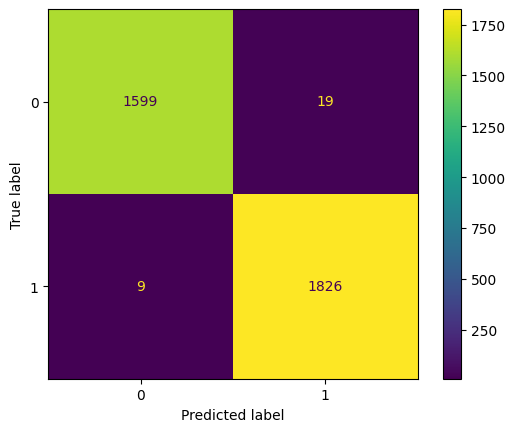

In [21]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred)
plot_confusion_matrix(clf, test_set, test_label)
plt.show() 

In [22]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set)

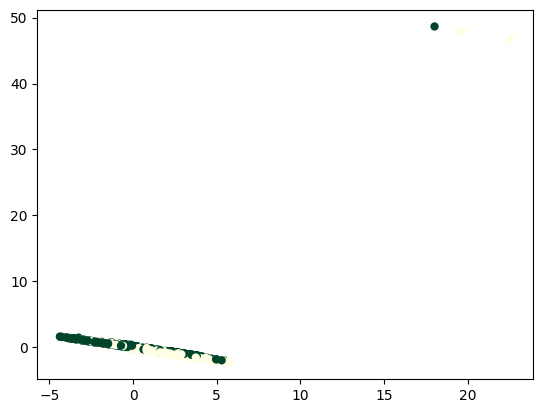

In [23]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25, cmap='YlGn');

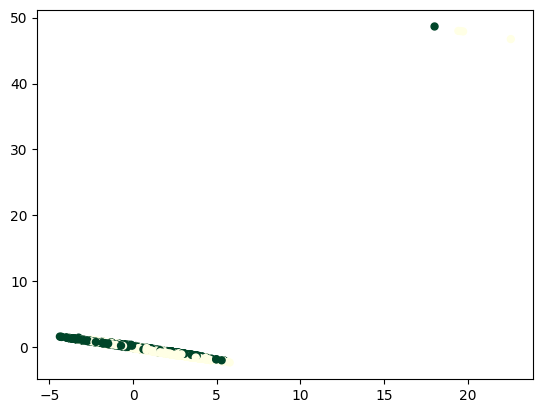

In [24]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25, cmap='YlGn');

### Removed Lang Attribute for classification

In [25]:
for lang in data.lang.unique():
    del data_classification[lang]

In [26]:
data_classification.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903
2358850842,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495
137959629,7,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.0,0.165387,0.530838,5.105129,0.826239,13.034008
2571493866,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.0,0.056365,0.243387,5.248623,0.016772,0.142619


In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_label, test_label = train_test_split(data_classification, data_label, stratify =data_label, test_size=0.30)

In [28]:
scaler = StandardScaler()

train_set = scaler.fit_transform(train_set.values)
test_set = scaler.transform(test_set.values)

In [29]:
# make grid search

parameters = {
    'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 
    'C':[0.1, 1, 10],
    'gamma' : ['scale', 'auto'],
}

svc = SVC()

grid_search = GridSearchCV(svc, parameters)


grid_search.fit(train_set, train_label)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [30]:
clf = grid_search.best_estimator_

In [31]:
clf

SVC(C=1, kernel='linear')

In [32]:
#predict on the test set
train_pred = clf.predict(train_set)
test_pred = clf.predict(test_set)

In [33]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9919304779639975
Accuracy test set  0.9921807124239791
Precision train set  0.9919303721453027
Recall train set  0.9919304779639975
F1 score train set  0.9919302869115387
Support train set  (array([0.99177937, 0.99206349]), array([0.99099099, 0.9927587 ]), array([0.99138502, 0.99241097]), array([3774, 4281]))


In [34]:
#compute the performance of the model
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.99      0.99      0.99      1618
         >50       0.99      0.99      0.99      1835

    accuracy                           0.99      3453
   macro avg       0.99      0.99      0.99      3453
weighted avg       0.99      0.99      0.99      3453



In [35]:
# cross validation
scores = cross_validate(clf, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.1026309331258138
Score time  0.023758490880330402
Test score  0.9915580384854128
Train score  0.9927374301675977


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


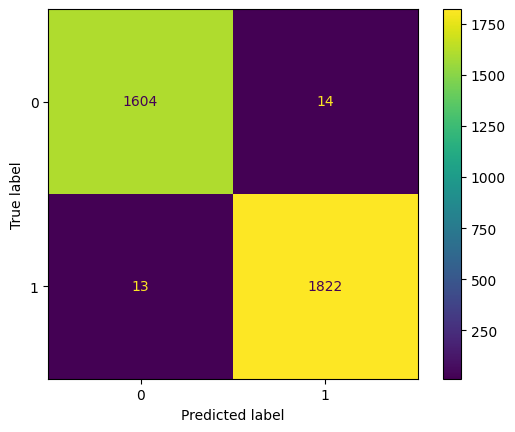

In [36]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred)
plot_confusion_matrix(clf, test_set, test_label)
plt.show() 

In [37]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set)

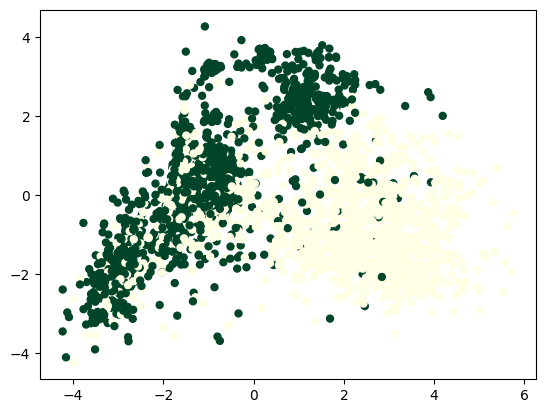

In [38]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25, cmap='YlGn');

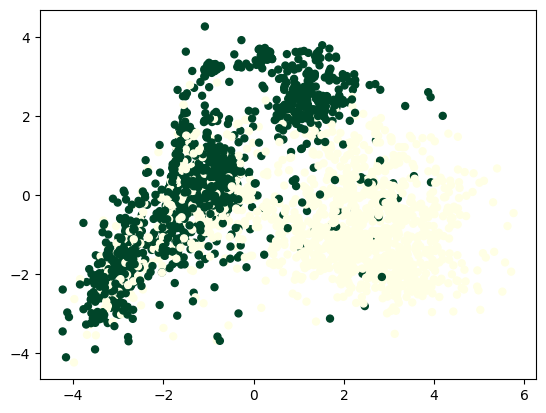

In [39]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25, cmap='YlGn');